In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [24]:
# Load data
df = pd.read_csv('Breast Cancer Wisconsin Diagnosis.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [25]:
# Trim Outliers
def trim_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Cap Outliers
def cap_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    for col in columns:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df


In [26]:
# Prepare three datasets
features = df.drop('diagnosis', axis=1).columns

df_original = df.copy()
df_trimmed = trim_outliers(df.copy(), features)
df_capped = cap_outliers(df.copy(), features)

datasets = {
    'Original': df_original,
    'Trimmed': df_trimmed,
    'Capped': df_capped
}

results = []

# Cross-validation
for name, data in datasets.items():
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = LogisticRegression(max_iter=1000)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    
    for score in scores:
        results.append({'Dataset': name, 'Accuracy': score})


C:\Users\user\AppData\Local\Temp\ipykernel_20500\1653671975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Accuracy', data=results_df, palette='Set2')


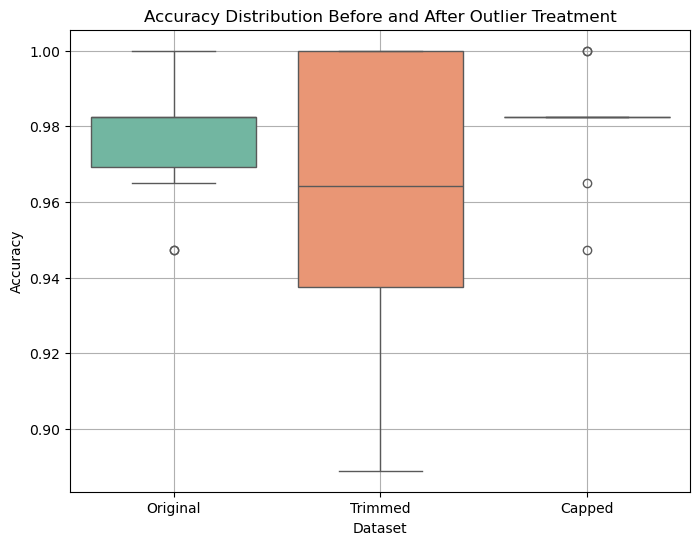

In [27]:
# Create DataFrame from results
results_df = pd.DataFrame(results)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dataset', y='Accuracy', data=results_df, palette='Set2')
plt.title('Accuracy Distribution Before and After Outlier Treatment')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# (Capping at 1st and 99th Percentiles)

In [28]:
X_capped = X.copy()
for col in X.columns:
    lower = X[col].quantile(0.01)
    upper = X[col].quantile(0.99)
    X_capped[col] = np.clip(X[col], lower, upper)
X_capped.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.936928,122.80,1001.0,0.118400,0.277061,0.3001,0.14710,0.24190,0.07871,...,25.38,17.33,184.60,2019.0,0.162200,0.665600,0.7119,0.2654,0.460100,0.118900
1,20.57,17.770000,132.90,1326.0,0.084740,0.078640,0.0869,0.07017,0.18120,0.05667,...,24.99,23.41,158.80,1956.0,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,19.69,21.250000,130.00,1203.0,0.109600,0.159900,0.1974,0.12790,0.20690,0.05999,...,23.57,25.53,152.50,1709.0,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,11.42,20.380000,77.58,386.1,0.132692,0.277061,0.2414,0.10520,0.25952,0.08480,...,14.91,26.50,98.87,567.7,0.188495,0.774466,0.6869,0.2575,0.486495,0.140541
4,20.29,14.340000,135.10,1297.0,0.100300,0.132800,0.1980,0.10430,0.18090,0.05883,...,22.54,16.67,152.20,1575.0,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


# trimmmed data over range of first and last 99th data row points_ 

In [29]:
X_trimmed = X.copy()
for col in X.columns:
    lower = X[col].quantile(0.01)
    upper = X[col].quantile(0.99)
    X_trimmed = X_trimmed[(X_trimmed[col] >= lower) & (X_trimmed[col] <= upper)]

# Align y with trimmed X
y_trimmed = y[X_trimmed.index]
y_trimmed.head()

1    1
2    1
4    1
5    1
6    1
Name: diagnosis, dtype: int64

In [30]:
def train_pipeline(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{label} Accuracy: {acc:.4f}")
    return acc


In [31]:
acc_original = train_pipeline(X, y, "Original")
acc_capped = train_pipeline(X_capped, y, "Capped")
acc_trimmed = train_pipeline(X_trimmed, y_trimmed, "Trimmed")


Original Accuracy: 0.9825
Capped Accuracy: 0.9825
Trimmed Accuracy: 0.9663


C:\Users\user\AppData\Local\Temp\ipykernel_20500\2629202528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracies, palette='viridis')


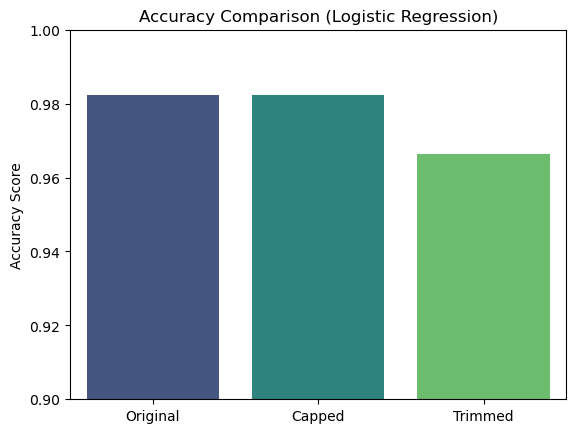

In [32]:
methods = ['Original', 'Capped', 'Trimmed']
accuracies = [acc_original, acc_capped, acc_trimmed]

sns.barplot(x=methods, y=accuracies, palette='viridis')
plt.title("Accuracy Comparison (Logistic Regression)")
plt.ylabel("Accuracy Score")
plt.ylim(0.9, 1.0)
plt.show()


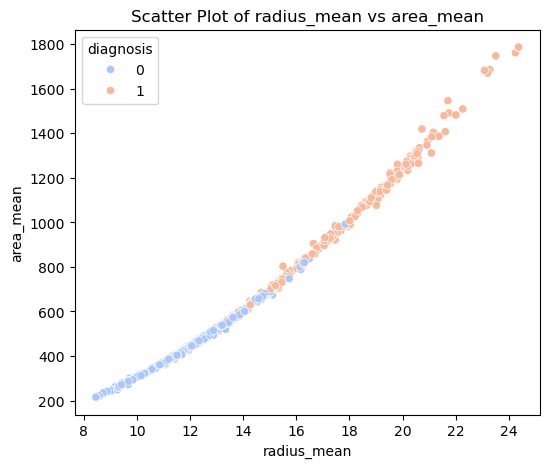

In [33]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='radius_mean', y='area_mean', hue=y, data=X.join(y), palette='coolwarm')
plt.title("Scatter Plot of radius_mean vs area_mean")
plt.show()
